In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import stats
import scipy

In [2]:
df = pd.read_csv("VR_Participants - Presence.csv", delimiter=",")

In [3]:
df = df.dropna()

questions = ["aware of environment","attention real environment","present in vr","hands located in vr"]

for c in questions:
    df[c] = df[c].astype(int)
    df[c] = df[c].apply(lambda x: x + 4)

In [4]:
df["condition"] = df["condition"].apply(lambda x: x.replace(" ", ""))
labels = df["condition"].unique()

In [5]:
pos = []
for i in range(4*4):
    if i%4 == 0:
        continue
    pos.append(i)

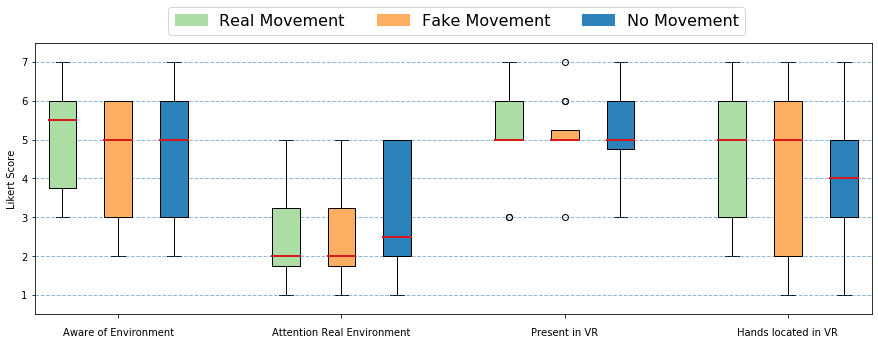

In [6]:
fig, ax = plt.subplots(1,figsize = (15,5))

plt.rcParams.update({'font.size': 16})

xtick_labels = ["Aware of Environment","Attention Real Environment","Present in VR","Hands located in VR"]
xticks = np.arange(2, 16, 4)

question_labels = ['Real Movement', 'Fake Movement', 'No Movement']
colors = ['#abdda4','#fdae61','#2b83ba','#d7191c']

patches = []
for i in range(len(question_labels)):
    patch = mpatches.Patch(color=colors[i], label=question_labels[i])
    patches.append(patch)

data = []
for i,q in enumerate(questions):
    x = df[df.condition == "real"][q].values
    y = df[df.condition == "fake"][q].values
    z = df[df.condition == "none"][q].values
    data.append(x)
    data.append(y)
    data.append(z)
bp = ax.boxplot(data, positions = pos, patch_artist=True)
ax.set_ylim(0.5,7.5)
ax.tick_params(axis='x', pad=10)
ax.set_yticks([1,2,3,4,5,6,7])
ax.set_ylabel("Likert Score")
plt.xticks(xticks, xtick_labels)
plt.legend(handles = patches,ncol = 3, bbox_to_anchor=(0.15, 1))

i = 1
for box in bp['boxes']:
    if i % 3 == 1:
        # change fill color
        box.set( facecolor = colors[0] )
    elif i%3 == 2:
        box.set( facecolor = colors[1] )
    else:
        # change fill color
        box.set( facecolor = colors[2] )
    i += 1

for median in bp['medians']:
    median.set(color=colors[3], linewidth=2)
    #ax.set_xticklabels(["Low_level", "High_level"])
    
for i in range(1,8):
    ax.axhline(y=i, xmin=0, xmax=21, linestyle = "--", alpha = 0.5,linewidth = 1)

plt.savefig("presence.svg", bbox_inches="tight")
plt.show()

In [7]:
df["attention real environment"].describe()

count    36.000000
mean      2.750000
std       1.441725
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: attention real environment, dtype: float64